<a href="https://colab.research.google.com/github/ThomasMoming/Week2_DataPreprocessing/blob/Week_2/Data_Preprocessing_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
!pip install resampy

from glob import glob
import librosa
import IPython.display as ipd

# 定义 RAVDESS 和自定义数据集路径
ravdess_path = '/content/drive/MyDrive/Audio_Data/audio_speech_actors_01-24/Actor_*/*.wav'
my_data_path = '/content/drive/MyDrive/Audio_Data/Actor_25/*.wav'

# 获取文件列表
ravdess_files = glob(ravdess_path, recursive=True)
my_data_files = glob(my_data_path, recursive=True)

# 打印文件数以验证
print(f"RAVDESS: {len(ravdess_files)}")
print(f"My: {len(my_data_files)}")

# 合并两个数据集的文件列表
all_files = ravdess_files + my_data_files

RAVDESS: 1440
My: 8


In [3]:
# 情感
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# 从文件名中提取情感标签的函数
def get_emotion_from_filename(file_name):
    file_base = os.path.basename(file_name)
    emotion_code = file_base.split('-')[2]  # 提取情感编号
    return emotions[emotion_code]

# 测试从文件名获取情感
test_file = my_data_files[0]
test_emotion = get_emotion_from_filename(test_file)
print(f"提取的情感标签: {test_emotion}")


提取的情感标签: neutral


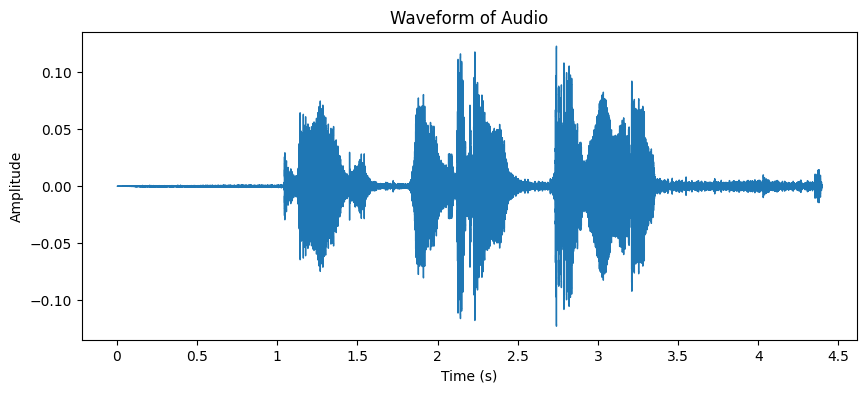

In [6]:

file_path = my_data_files[1]
audio_data, sample_rate = librosa.load(file_path)

# 绘制波形
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Waveform of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

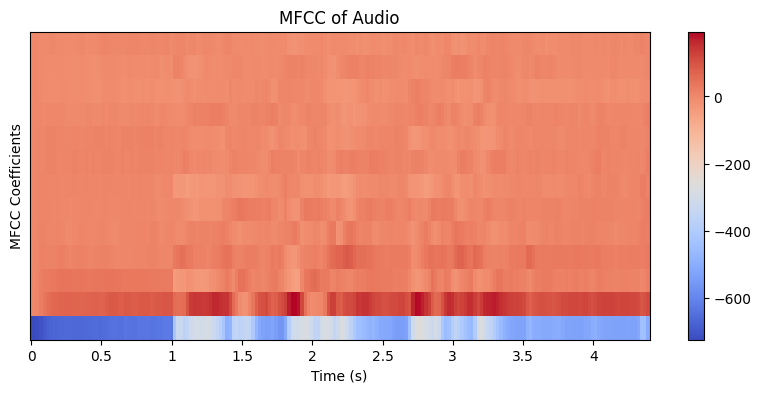

In [7]:
# 提取MFCC特征
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

# 绘制MFCC特征
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.colorbar()
plt.title('MFCC of Audio')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

In [8]:
# 为每个音频文件提取MFCC特征的函数
def extract_mfcc(file_list, label):
    mfcc_features = []
    emotions_labels = []

    for file_path in file_list:
        # 加载音频文件
        audio_data, sample_rate = librosa.load(file_path)

        # 提取MFCC特征
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

        # 将MFCC特征转换为其均值来进行简化
        mfcc_mean = np.mean(mfccs.T, axis=0)

        # 添加MFCC特征和情感标签到列表中
        mfcc_features.append(mfcc_mean)

        # 从文件名中提取情感标签
        emotion = get_emotion_from_filename(file_path)
        emotions_labels.append(emotion)

    return np.array(mfcc_features), emotions_labels

# 分别对ravdess_files和my_data_files提取MFCC特征
ravdess_mfcc, ravdess_emotions = extract_mfcc(ravdess_files, "ravdess")
my_data_mfcc, my_data_emotions = extract_mfcc(my_data_files, "my_data")

# 查看提取的特征形状
print(f"RAVDESS MFCC特征形状: {ravdess_mfcc.shape}")
print(f"我的数据集MFCC特征形状: {my_data_mfcc.shape}")

RAVDESS MFCC特征形状: (1440, 13)
我的数据集MFCC特征形状: (8, 13)


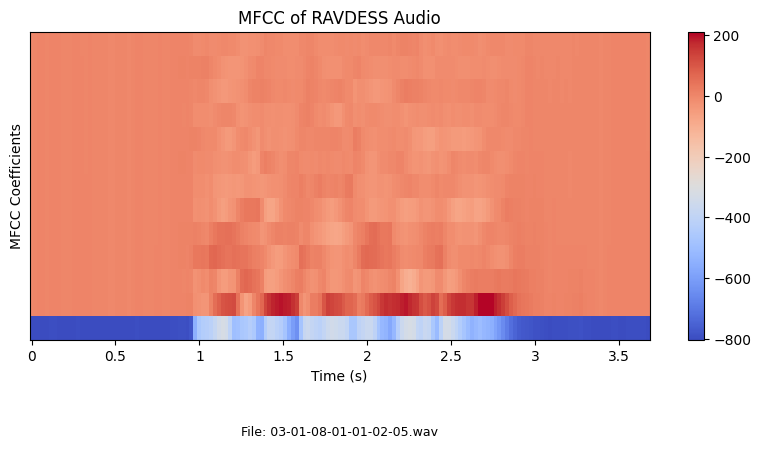

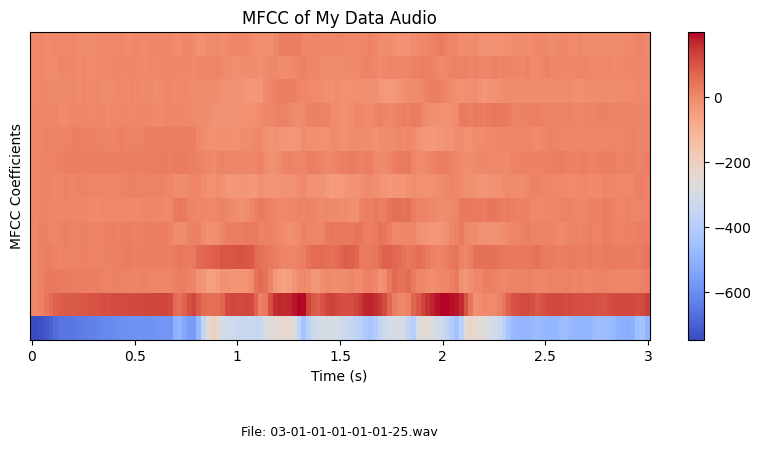

In [14]:
# 绘制部分MFCC特征（RAVDESS 和我的数据集各绘制一个文件的特征）
def plot_mfcc(mfcc_features, title, file_name):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc_features, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')

    # 在图表下方添加文件名
    plt.text(0.5, -0.3, f"File: {file_name}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=9)

    plt.show()
    plt.close()

my_file_example = my_data_files[0]
ravdess_files_example = ravdess_files[26]

# 绘制RAVDESS中的第一个文件的MFCC特征
file_name = os.path.basename(ravdess_files_example)
audio_data, sample_rate = librosa.load(ravdess_files_example)
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
plot_mfcc(mfccs, 'MFCC of RAVDESS Audio', file_name)

# 绘制自定义数据集中的第一个文件的MFCC特征
file_name = os.path.basename(my_file_example)
audio_data, sample_rate = librosa.load(my_file_example)
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
plot_mfcc(mfccs, 'MFCC of My Data Audio', file_name)


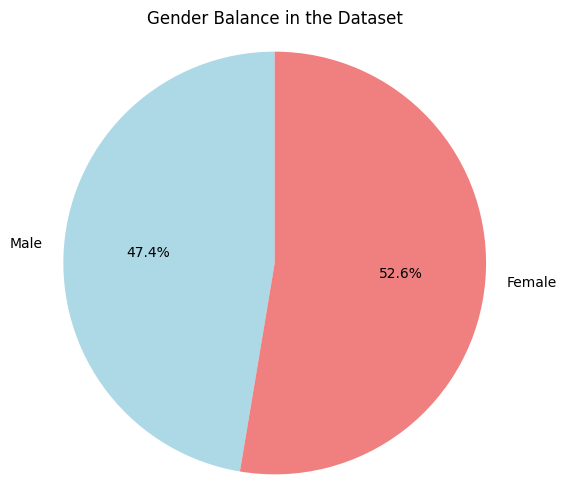

In [25]:
def gender_balance_analysis(files):
    male_count = len([f for f in files if 'Actor_0' in f])  # 男性演员
    female_count = len([f for f in files if 'Actor_1' in f])  # 女性演员

    labels = ['Male', 'Female']
    sizes = [male_count, female_count]

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Gender Balance in the Dataset')
    plt.show()



# 性别平衡分析
gender_balance_analysis(all_files)

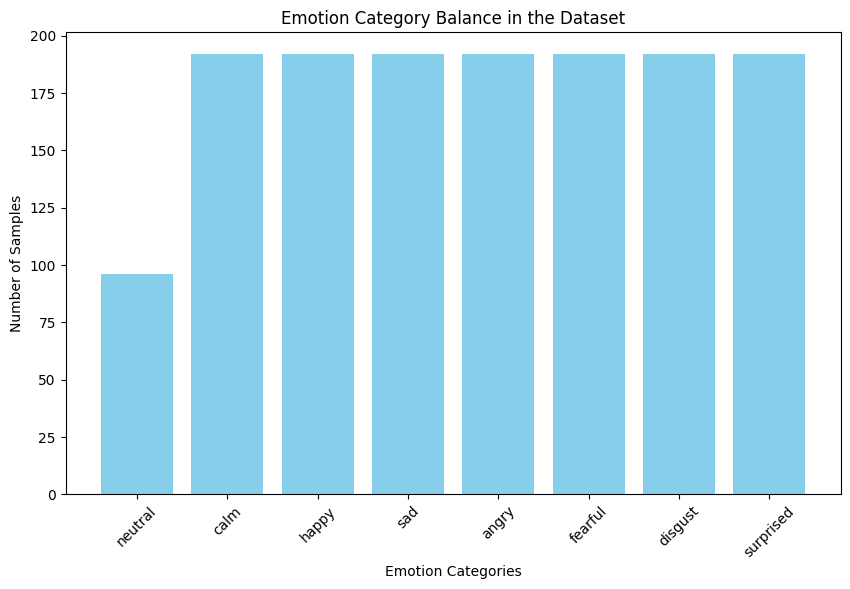

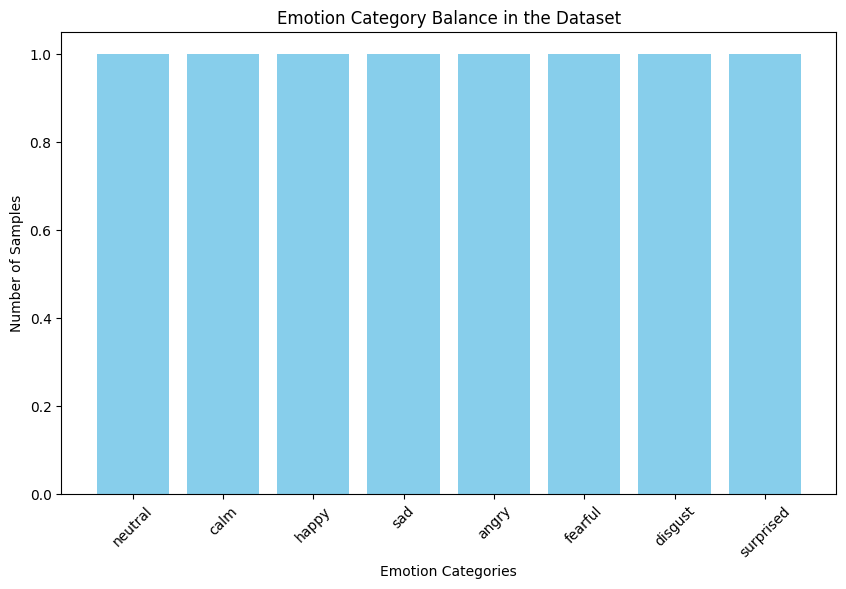

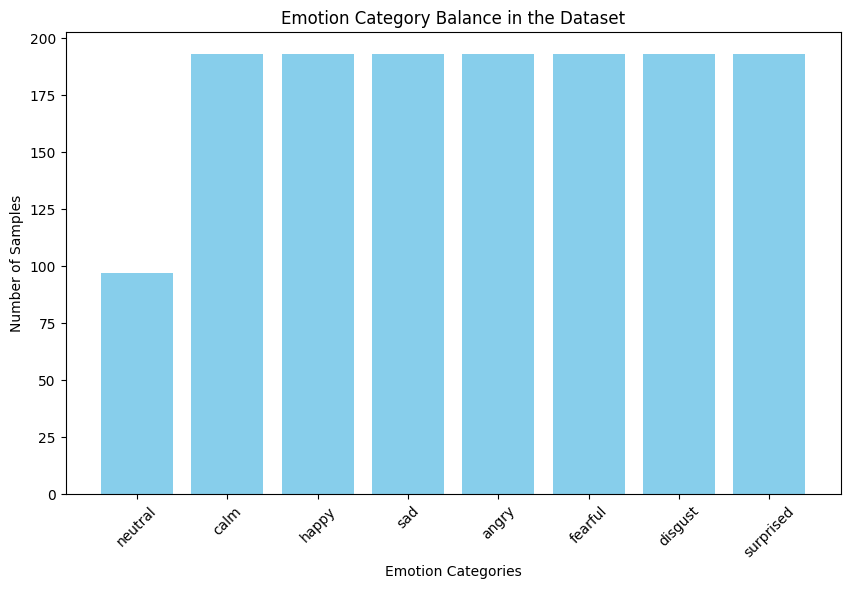

In [24]:
# 情感类别平衡分析
def emotion_category_balance(files):
    emotion_dict = {'neutral': 0, 'calm': 0, 'happy': 0, 'sad': 0,
                    'angry': 0, 'fearful': 0, 'disgust': 0, 'surprised': 0}

    for file in files:
        # 获取情感编号（假设情感编码在文件名中）
        file_base = os.path.basename(file)
        emotion_code = file_base.split('-')[2]
        if emotion_code in emotions:
            emotion_dict[emotions[emotion_code]] += 1

    emotions_list = list(emotion_dict.keys())
    counts = list(emotion_dict.values())

    plt.figure(figsize=(10, 6))
    plt.bar(emotions_list, counts, color='skyblue')
    plt.xlabel('Emotion Categories')
    plt.ylabel('Number of Samples')
    plt.title('Emotion Category Balance in the Dataset')
    plt.xticks(rotation=45)
    plt.show()

emotion_category_balance(ravdess_files)
emotion_category_balance(my_data_files)
emotion_category_balance(all_files)